#                            1.DOWNLOAD DATASET


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import copy

#                             2.LOAD THE DATASET

In [81]:
data=pd.read_csv(r"C:\IBM PROJECT\Churn_Modelling.csv")

In [82]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int32(2), int64(8), object(1)
memory usage: 1015.8+ KB


#                               3.VISUALIZATIONS

 1 .UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Count'>

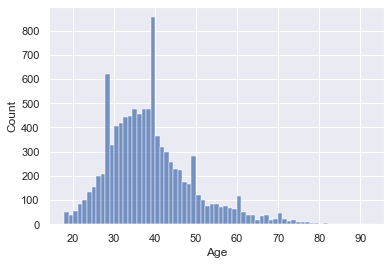

In [84]:
sns.histplot(data['Age'])

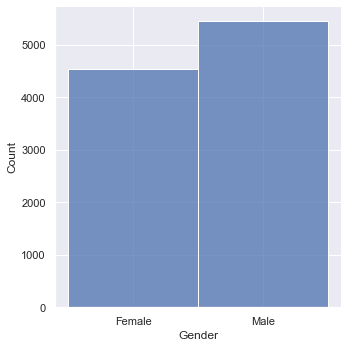

In [85]:
sns.displot(data['Gender'])

2.BI-VARIATE ANALYSIS

C:\Users\Guna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='IsActiveMember'>

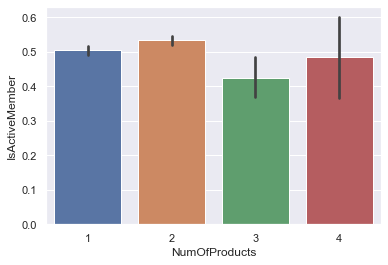

In [86]:
sns.barplot(data['NumOfProducts'],data['IsActiveMember'])

C:\Users\Guna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


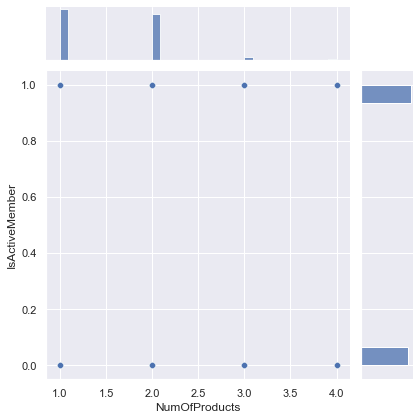

In [87]:
sns.jointplot(data['NumOfProducts'],data['IsActiveMember'])

C:\Users\Guna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


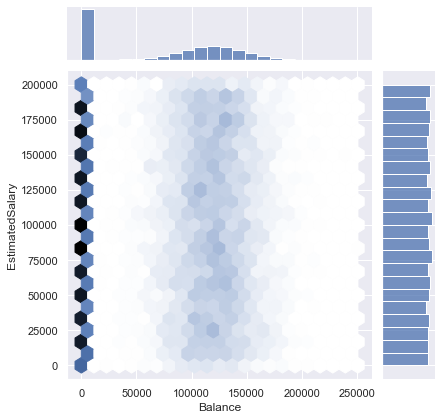

In [88]:
sns.jointplot(data["Balance"],data["EstimatedSalary"],kind="hex")

3.MULTI-VARIATE ANALYSIS

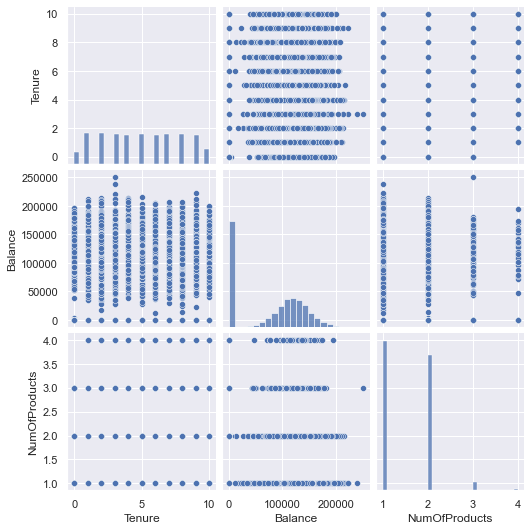

In [89]:
sns.pairplot(data[['Tenure','Balance','NumOfProducts']])

C:\Users\Guna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Balance'>

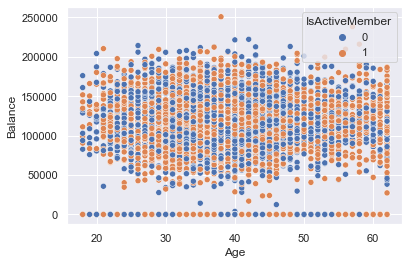

In [114]:
sns.scatterplot(data["Age"],data["Balance"],hue=data["IsActiveMember"])


#                          4.DESCRIPTIVE STATISTICS ON THE DATASET


In [91]:
data.mean()

C:\Users\Guna\AppData\Local\Temp\ipykernel_10916\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [92]:
data.median()

C:\Users\Guna\AppData\Local\Temp\ipykernel_10916\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [93]:
data.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#                               5.HANDLING MISSING VALUES


In [94]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [95]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#                                   6.FIND AND REPLACE THE OUTLIERS


C:\Users\Guna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

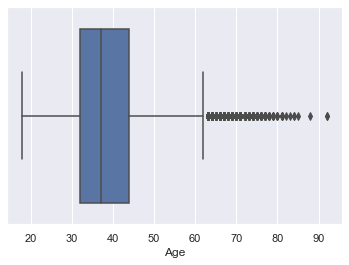

In [96]:
sns.boxplot(data['Age'])

In [97]:
data.shape

(10000, 14)

In [98]:
min,max=data.Age.quantile([0.001,0.999])
min,max

(18.0, 81.0)

In [99]:
data2=data[(data.Age<max) & (data.Age>min)]
data2.shape

(9966, 14)

In [100]:
Q1=data['Age'].quantile(0.25)
Q3=data['Age'].quantile(0.75)
IQR=Q3-Q1
whisker_width = 1.5
age_outliers = data[(data['Age'] < Q1 - whisker_width*IQR) | (data['Age'] > Q3 + whisker_width*IQR)]
age_outliers.count()

RowNumber          359
CustomerId         359
Surname            359
CreditScore        359
Geography          359
Gender             359
Age                359
Tenure             359
Balance            359
NumOfProducts      359
HasCrCard          359
IsActiveMember     359
EstimatedSalary    359
Exited             359
dtype: int64

In [101]:
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Age']=np.where(data['Age']>upper_whisker,upper_whisker,np.where(data['Age']<lower_whisker,lower_whisker,data['Age']))
data['Age']

0       42.0
1       41.0
2       42.0
3       39.0
4       43.0
        ... 
9995    39.0
9996    35.0
9997    36.0
9998    42.0
9999    28.0
Name: Age, Length: 10000, dtype: float64

#                           7.CHECK AND ENCODE CATEGORICAL DATA


In [102]:
label=preprocessing.LabelEncoder()
data['Gender']=label.fit_transform(data['Gender'])
data['Gender'].unique()
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,1,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,1,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,0,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,1,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,1,27.0,2,134603.88,1,1,1,71725.73,0


In [103]:
label2=preprocessing.LabelEncoder()
data['Geography']=label2.fit_transform(data['Geography'])
data['Geography'].unique()
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,1,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,1,0,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27.0,2,134603.88,1,1,1,71725.73,0


#                              8.DEPENDENT AND INDEPENDENT VARIABLES


In [104]:
x=data.iloc[:,3:11]
y=data.iloc[:,12]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard
0,619,0,0,42.0,2,0.00,1,1
1,608,2,0,41.0,1,83807.86,1,0
2,502,0,0,42.0,8,159660.80,3,1
3,699,0,0,39.0,1,0.00,2,0
4,850,2,0,43.0,2,125510.82,1,1
...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1
9996,516,0,1,35.0,10,57369.61,1,1
9997,709,0,0,36.0,7,0.00,1,0
9998,772,1,1,42.0,3,75075.31,2,1


In [105]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

#                             9.SCALE INDEPENDENT VARIABLES


In [106]:
normalized_X =preprocessing.normalize(x)
normalized_X

array([[9.97698238e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.61179037e-03, 1.61179037e-03],
       [7.25449770e-03, 2.38634793e-05, 0.00000000e+00, ...,
        9.99973566e-01, 1.19317396e-05, 0.00000000e+00],
       [3.14414998e-03, 0.00000000e+00, 0.00000000e+00, ...,
        9.99995021e-01, 1.87897409e-05, 6.26324697e-06],
       ...,
       [9.98663861e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.40855270e-03, 0.00000000e+00],
       [1.02824626e-02, 1.33192520e-05, 1.33192520e-05, ...,
        9.99946976e-01, 2.66385041e-05, 1.33192520e-05],
       [6.08551051e-03, 0.00000000e+00, 0.00000000e+00, ...,
        9.99981459e-01, 7.68372539e-06, 7.68372539e-06]])

In [115]:
standardized_X = preprocessing.scale(x)
standardized_X

array([[-0.32622142, -0.90188624, -1.09598752, ..., -1.22584767,
        -0.91158349,  0.64609167],
       [-0.44003595,  1.51506738, -1.09598752, ...,  0.11735002,
        -0.91158349, -1.54776799],
       [-1.53679418, -0.90188624, -1.09598752, ...,  1.33305335,
         2.52705662,  0.64609167],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.22584767,
        -0.91158349, -1.54776799],
       [ 1.25683526,  0.30659057,  0.91241915, ..., -0.02260751,
         0.80773656,  0.64609167],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.85996499,
        -0.91158349,  0.64609167]])

#                    10.SPLIT INTO TRAINING AND TESTING
      

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
(6700, 8) (3300, 8) (6700,) (3300,)
X_train

(6700, 8) (3300, 8) (6700,) (3300,)


<>:3: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\Guna\AppData\Local\Temp\ipykernel_10916\1305516454.py:3: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  (6700, 8) (3300, 8) (6700,) (3300,)
C:\Users\Guna\AppData\Local\Temp\ipykernel_10916\1305516454.py:3: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  (6700, 8) (3300, 8) (6700,) (3300,)
C:\Users\Guna\AppData\Local\Temp\ipykernel_10916\1305516454.py:3: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  (6700, 8) (3300, 8) (6700,) (3300,)
C:\Users\Guna\AppData\Local\Temp\ipykernel_10916\1305516454.py:3: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  (6700, 8) (3300, 8) (6700,) (3300,)
C:\Users\Guna\AppData\Local\Temp\ipykernel_10916\1305516454.py:3: SyntaxWarning: 'tuple' object is not callable; perhaps y

TypeError: 'tuple' object is not callable

In [109]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard
7473,609,2,1,32.0,4,99883.16,1,1
2257,686,2,0,35.0,4,0.00,2,1
1941,452,2,1,44.0,3,88915.85,1,1
7775,628,2,1,40.0,10,0.00,2,1
4693,543,0,0,32.0,7,147256.86,1,1
...,...,...,...,...,...,...,...,...
5964,599,2,1,35.0,6,137102.65,1,0
7447,636,1,1,30.0,8,141787.31,2,1
7550,688,0,0,38.0,7,123544.21,1,1
7027,464,1,1,37.0,4,155994.15,1,0


In [110]:
y_train

7473    120594.85
2257    159676.55
1941     69697.74
7775    103832.58
4693    112771.95
          ...    
5964     76870.81
7447    109685.61
7550    157664.02
7027    143665.44
1599     29483.87
Name: EstimatedSalary, Length: 6700, dtype: float64

In [111]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard
2746,620,0,1,36.0,8,0.00,2,1
9591,708,2,1,40.0,8,83015.71,1,1
9262,734,1,0,52.0,6,71283.09,2,0
3494,681,0,0,37.0,7,69609.85,1,1
4813,517,2,1,39.0,3,0.00,2,0
...,...,...,...,...,...,...,...,...
4832,617,0,0,62.0,7,0.00,1,1
789,704,2,1,48.0,8,167997.60,1,1
2594,537,1,0,47.0,6,103163.35,1,1
6164,710,1,1,58.0,7,170113.00,2,0


In [112]:
y_test

2746    145937.99
9591    101089.76
9262     38984.37
3494     72127.83
4813     12465.51
          ...    
4832    160589.18
789     173498.45
2594     16259.64
6164     10494.64
3569    126381.60
Name: EstimatedSalary, Length: 3300, dtype: float64